In [49]:
import ee
import requests
import os
# Initialize the Earth Engine API
ee.Initialize(project='ts-rishimnb')


In [50]:
import geopandas as gpd
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)
bbox = gdf.total_bounds
print(bbox)

[78.00405826 16.93264351 79.04971836 17.90150706]


In [76]:
import ee
import geemap

# Initialize the Earth Engine API
ee.Initialize()

# Define the area of interest (AOI) using coordinates
bbox = ee.Geometry.Rectangle([78.00405826, 16.93264351, 79.04971836, 17.90150706])  # Example coordinates

# Choose the Sentinel-2 image collection and filter by date and bounds
image_collection = ee.ImageCollection("MODIS/061/MOD11A1") \
    .filterBounds(bbox) \
    .filterDate('2023-06-01', '2023-06-30') \

img =image_collection.mean()

# Specify the bands to download (e.g., true color bands B4, B3, B2)
url = img.getDownloadUrl({
    'bands': [
    "LST_Night_1km"],
    'region': bbox,
    'scale': 1000,
    'format': 'GEO_TIFF'
})
response = requests.get(url)
with open('nlst.tif', 'wb') as fd:
  fd.write(response.content)

GeoTIFF Metadata:
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 117, 'height': 109, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008983152841195215, 0.0, 78.00071612009806,
       0.0, -0.008983152841195215, 17.903423612502063), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


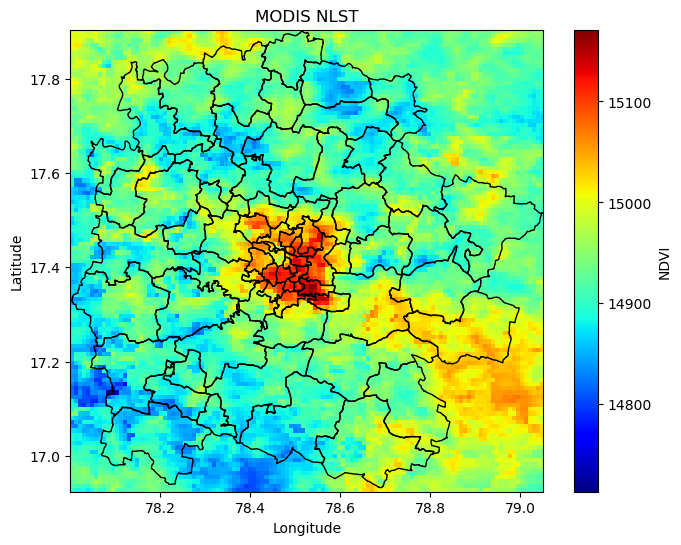

In [77]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the GeoTIFF file
geo_tiff_path = 'nlst.tif'  # Replace with your file path

with rasterio.open(geo_tiff_path) as src:
    # Read the first band (MODIS data can have multiple bands)
    band1 = src.read(1)
    
    # Get metadata
    profile = src.profile
    print("GeoTIFF Metadata:")
    print(profile)
    
    # Get the affine transformation
    transform = src.transform
    
    # Calculate the extent of the image for plotting
    # Extent is defined as (xmin, xmax, ymin, ymax) in the image's coordinate system
    xmin, ymax = transform * (0, 0)
    xmax, ymin = transform * (band1.shape[1], band1.shape[0])
    extent = [xmin, xmax, ymin, ymax]
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.imshow(band1, cmap='jet', extent=extent)  # Use the 'extent' to set the correct coordinates
    plt.title('MODIS NLST')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='NDVI')
    gdf.plot(ax=plt.gca(), facecolor='none', edgecolor='black')
    plt.show()


In [78]:
for i in band1:
    print(i)
print(np.shape(band1))
print("need 30,16")

[14998.42857143 15002.57142857 14995.14285714 14987.
 14983.85714286 14991.42857143 14998.42857143 14984.28571429
 14969.57142857 14961.71428571 14951.14285714 14944.14285714
 14933.14285714 14952.14285714 14959.125      14964.625
 14956.25       14971.25       14985.57142857 14993.71428571
 14974.14285714 14935.28571429 14922.71428571 14920.85714286
 14916.57142857 14933.57142857 14943.71428571 14956.71428571
 15003.875      15013.5        14969.5        14943.625
 14929.25       14936.         14958.5        14995.25
 15029.375      15037.75       15027.375      15002.625
 14976.625      14970.75       14963.5        14947.375
 14943.125      14942.25       14936.625      14930.22222222
 14933.77777778 14932.66666667 14928.22222222 14933.33333333
 14943.22222222 14946.77777778 14928.6        14925.2
 14929.1        14939.         14962.55555556 14951.7
 14937.6        14946.5        14950.3        14940.7
 14933.         14971.33333333 14971.44444444 14955.11111111
 14947.         14